1. Without using Hidden layer and using circle dataset

Accuracy without hidden layer: 0.5000


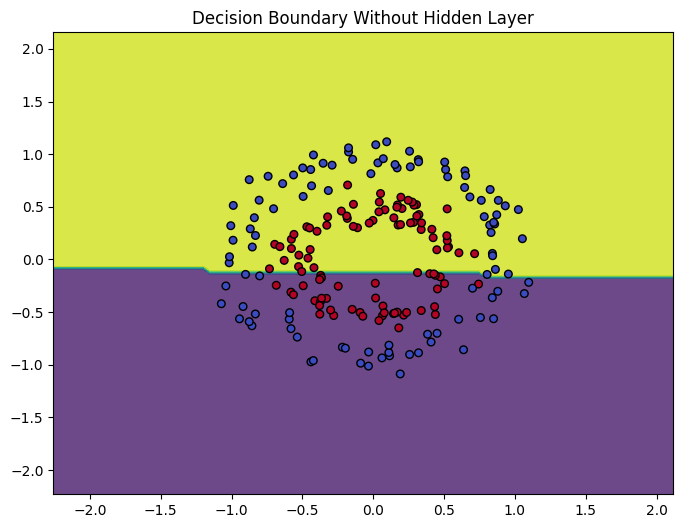

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create the "circle" dataset
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a neural network without hidden layers (no activation)
model = MLPClassifier(hidden_layer_sizes=(), activation='identity', max_iter=1000, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without hidden layer: {accuracy:.4f}")

# Plot decision boundary
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='o', s=30, cmap=plt.cm.coolwarm)
plt.title("Decision Boundary Without Hidden Layer")
plt.show()


2. With using Hidden layer using moon dataset

Epoch 0, Loss: 0.8088002988494126
Epoch 1000, Loss: 1.375097146852717
Epoch 2000, Loss: 1.8091088900267032
Epoch 3000, Loss: 2.2464923070713008
Epoch 4000, Loss: 2.437594058353773
Epoch 5000, Loss: 2.385147279452335
Epoch 6000, Loss: 2.2209706225761088
Epoch 7000, Loss: 2.136446342498066
Epoch 8000, Loss: 2.1456546379028176
Epoch 9000, Loss: 2.171928287242948


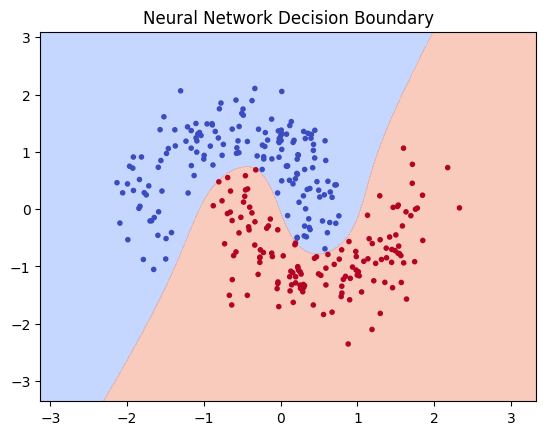

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate moon dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the neural network structure
input_size = X_train.shape[1]  # 2 features
hidden_size = 5  # 1 hidden layer with 5 neurons
output_size = 1  # Binary classification

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative
def sigmoid_derivative(x):
    return x * (1 - x)

# Training parameters
learning_rate = 0.01
epochs = 10000

# Training loop
for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X_train, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Compute the loss (Binary Cross-Entropy)
    loss = -np.mean(y_train * np.log(A2) + (1 - y_train) * np.log(1 - A2))

    # Backpropagation
    dA2 = A2 - y_train.reshape(-1, 1)
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X_train.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Make predictions on the test set
Z1_test = np.dot(X_test, W1) + b1
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(A1_test, W2) + b2
A2_test = sigmoid(Z2_test)

# Plot decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = np.dot(sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
Z = sigmoid(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="coolwarm", alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=A2_test.flatten() > 0.5, cmap="coolwarm", marker='.')
plt.title("Neural Network Decision Boundary")
plt.show()
